In [2]:
# 3-3

import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

x_train_final = x_train.reshape((-1, 28, 28, 1)) / 255.
x_test_final = x_test.reshape((-1, 28, 28, 1)) / 255.

4422102/4422102 [==============================] - 1s 0us/step


In [46]:
from google.colab import files

uploaded = files.upload()

Saving Bag.png to Bag (3).png
Saving Trouser.png to Trouser (3).png
Saving 샌들.png to 샌들 (4).png


In [20]:
# 1쌍 모델
model_with_conv1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(96, (3,3), padding='same', activation='relu',
                          input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2,2), strides=2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model_with_conv1.compile(optimizer='adam',
                        loss='sparse_categorical_crossentropy',
                        metrics=['accuracy'])

model_with_conv1.fit(x_train_final, y_train, epochs=5, verbose=0)

# model_with_conv1.fit(x_test_final, y_test, verbose=2)

In [86]:
# 2쌍 모델
model_with_conv2 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(128, (3,3), padding='same', activation='relu',
                          input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((3,3), strides=2),
    tf.keras.layers.Conv2D(256, (5,5), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D((1,1), strides=2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model_with_conv2.compile(optimizer='adam',
                        loss='sparse_categorical_crossentropy',
                        metrics=['accuracy'])

model_with_conv2.fit(x_train_final, y_train, epochs=5)
model_with_conv2.fit(x_test_final, y_test, verbose=2)

Epoch 1/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.3655 - accuracy: 0.8669
Epoch 2/5
1875/1875 [==============================] - 14s 8ms/step - loss: 0.2362 - accuracy: 0.9123
Epoch 3/5
1875/1875 [==============================] - 12s 7ms/step - loss: 0.1927 - accuracy: 0.9278
Epoch 4/5
1875/1875 [==============================] - 12s 7ms/step - loss: 0.1573 - accuracy: 0.9412
Epoch 5/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1314 - accuracy: 0.9509
313/313 - 2s - loss: 0.2268 - accuracy: 0.9184 - 2s/epoch - 7ms/step


In [89]:
# 3쌍 모델
model_with_conv3 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(128, (3,3), padding='same', activation='relu',
                          input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2,2), strides=2),
    tf.keras.layers.Conv2D(256, (5,5), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2), strides=2),
    tf.keras.layers.Conv2D(256, (3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D((1,1), strides=2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model_with_conv3.compile(optimizer='adam',
                        loss='sparse_categorical_crossentropy',
                        metrics=['accuracy'])

model_with_conv3.fit(x_train_final, y_train, epochs=5)
model_with_conv3.fit(x_test_final, y_test, verbose=2)

Epoch 1/5
1875/1875 [==============================] - 16s 8ms/step - loss: 0.3728 - accuracy: 0.8654
Epoch 2/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.2405 - accuracy: 0.9121
Epoch 3/5
1875/1875 [==============================] - 14s 8ms/step - loss: 0.1960 - accuracy: 0.9283
Epoch 4/5
1875/1875 [==============================] - 14s 8ms/step - loss: 0.1616 - accuracy: 0.9395
Epoch 5/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.1317 - accuracy: 0.9507
313/313 - 3s - loss: 0.2290 - accuracy: 0.9180 - 3s/epoch - 8ms/step


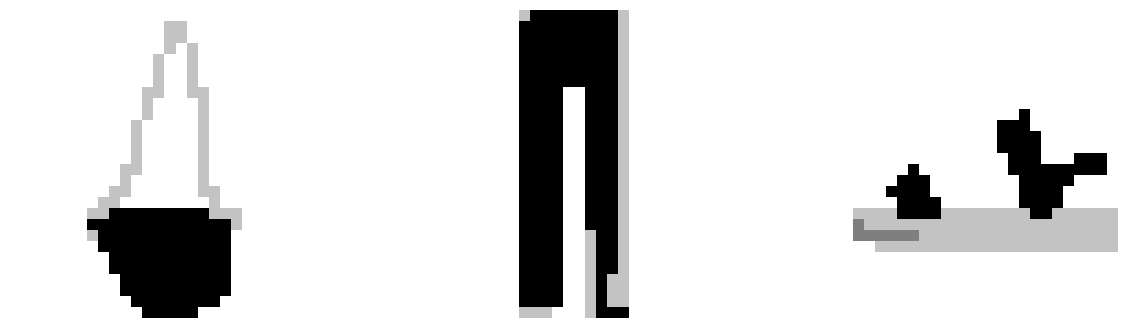

In [32]:
# 그린 그림 출력
import cv2
import matplotlib.pyplot as plt

# 업로드한 이미지 경로
image_path_1 = list(uploaded.keys())[0]
image_path_2 = list(uploaded.keys())[1]
image_path_3 = list(uploaded.keys())[2]

# 이미지 전처리
img1 = cv2.imread(image_path_1, cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread(image_path_2, cv2.IMREAD_GRAYSCALE)
img3 = cv2.imread(image_path_3, cv2.IMREAD_GRAYSCALE)

# 이미지를 28x28로 크기 조절
resized_img1 = cv2.resize(img1, (28, 28), interpolation=cv2.INTER_LINEAR)
resized_img2 = cv2.resize(img2, (28, 28), interpolation=cv2.INTER_LINEAR)
resized_img3 = cv2.resize(img3, (28, 28), interpolation=cv2.INTER_LINEAR)

# 이미지를 1차원 배열로 변환 및 정규화
resized_img1 = resized_img1.reshape((28, 28, 1)) / 255.0
resized_img2 = resized_img2.reshape((28, 28, 1)) / 255.0
resized_img3 = resized_img3.reshape((28, 28, 1)) / 255.0

img_list = [resized_img1, resized_img2, resized_img3]

plt.figure(figsize=(15, 4))  # 그림 크기를 적절하게 조절

for i in range(len(img_list)):
    plt.subplot(1, len(img_list), i + 1)
    plt.imshow(img_list[i].reshape(28, 28), cmap='gray')
    plt.axis('off')

plt.show()

In [91]:
from sklearn.metrics import accuracy_score
from PIL import Image

image_fil1 = list(uploaded.keys())[0]
image_fil2 = list(uploaded.keys())[1]
image_fil3 = list(uploaded.keys())[2]

image1 = Image.open(image_fil1)
image2 = Image.open(image_fil2)
image3 = Image.open(image_fil3)

image1 = image1.resize((28, 28))
image2 = image2.resize((28, 28))
image3 = image3.resize((28, 28))

image1 = image1.convert("L")
image2 = image2.convert("L")
image3 = image3.convert("L")

image_array1 = np.array(image1)
image_array2 = np.array(image2)
image_array3 = np.array(image3)

image_array1 = image_array1.reshape((1, 28, 28, 1))
image_array2 = image_array2.reshape((1, 28, 28, 1))
image_array3 = image_array3.reshape((1, 28, 28, 1))

predicted_label1 = model_with_conv1.predict(image_array1)
predicted_label2 = model_with_conv1.predict(image_array2)
predicted_label3 = model_with_conv1.predict(image_array3)

predicted_class1 = np.argmax(predicted_label1)
predicted_class2 = np.argmax(predicted_label2)
predicted_class3 = np.argmax(predicted_label3)

predicted_classes = [predicted_class1, predicted_class2, predicted_class3]
true_label = [0, 0, 0]
index = 0

for pc in predicted_classes:
  for y_label in y_test:
    if pc == y_label: # 예측한 레이블과 실제 레이블이 같은지 확인
      true_label[index] = 1.0          # 같다면 정답 레이블 1로 변경
      break
  index += 1

sum = 0
for a in true_label:
  sum += a
result = sum / 3
print(predicted_classes)
print("1쌍 모델 결과: {}".format(result))

1/1 [==============================] - 0s 40ms/step
[8, 5, 8]
1쌍 모델 결과: 1.0


In [93]:
predicted_label1 = model_with_conv2.predict(image_array1)
predicted_label2 = model_with_conv2.predict(image_array2)
predicted_label3 = model_with_conv2.predict(image_array3)

predicted_class1 = np.argmax(predicted_label1)
predicted_class2 = np.argmax(predicted_label2)
predicted_class3 = np.argmax(predicted_label3)

predicted_classes = [predicted_class1, predicted_class2, predicted_class3]
true_label = [0, 0, 0]
index = 0

for pc in predicted_classes:
  for y_label in y_test:
    if pc == y_label: # 예측한 레이블과 실제 레이블이 같은지 확인
      true_label[index] = 1.0          # 같다면 정답 레이블 1로 변경
      break
  index += 1

sum = 0
for a in true_label:
  sum += a
result = sum / 3
print(predicted_classes)
print("2쌍 모델 결과: {}".format(result))

1/1 [==============================] - 0s 51ms/step
[8, 8, 8]
2쌍 모델 결과: 1.0


In [95]:
predicted_label1 = model_with_conv3.predict(image_array1)
predicted_label2 = model_with_conv3.predict(image_array2)
predicted_label3 = model_with_conv3.predict(image_array3)

predicted_class1 = np.argmax(predicted_label1)
predicted_class2 = np.argmax(predicted_label2)
predicted_class3 = np.argmax(predicted_label3)

predicted_classes = [predicted_class1, predicted_class2, predicted_class3]
true_label = [0, 0, 0]
index = 0

for pc in predicted_classes:
  for y_label in y_test:
    if pc == y_label: # 예측한 레이블과 실제 레이블이 같은지 확인
      true_label[index] = 1.0          # 같다면 정답 레이블 1로 변경
      break
  index += 1

sum = 0
for a in true_label:
  sum += a
result = sum / 3
print(predicted_classes)
print("3쌍 모델 결과: {}".format(result))

1/1 [==============================] - 0s 26ms/step
[8, 8, 8]
3쌍 모델 결과: 1.0
